In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('ansel/transfer_data.csv', sep=",")

In [3]:
data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


In [4]:
data.isnull().sum()


PLAYER            1
WINDOW            1
POSITION       1128
COUNTRY         826
FROM              2
TO                1
DESCRIPTION       1
PRICE             1
LEAGUE            1
SEASON            1
dtype: int64

In [5]:
data.dtypes

PLAYER          object
WINDOW          object
POSITION        object
COUNTRY         object
FROM            object
TO              object
DESCRIPTION     object
PRICE          float64
LEAGUE          object
SEASON          object
dtype: object

In [48]:
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка PLAYER. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка WINDOW. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка POSITION. Тип данных object. Количество пустых значений 1128, 18.09%.
Колонка COUNTRY. Тип данных object. Количество пустых значений 826, 13.24%.
Колонка FROM. Тип данных object. Количество пустых значений 2, 0.03%.
Колонка TO. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка DESCRIPTION. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка PRICE. Тип данных float64. Количество пустых значений 1, 0.02%.
Колонка LEAGUE. Тип данных object. Количество пустых значений 1, 0.02%.
Колонка SEASON. Тип данных object. Количество пустых значений 1, 0.02%.


In [8]:
index_with_nan = data.index[data.isnull().any(axis=1)]
data.drop(index_with_nan,0, inplace=True)
data.shape
data.isnull().sum()


PLAYER         0
WINDOW         0
POSITION       0
COUNTRY        0
FROM           0
TO             0
DESCRIPTION    0
PRICE          0
LEAGUE         0
SEASON         0
dtype: int64

In [16]:
data['POSITION'].unique()

array(['Midfielder', 'Attacker', 'Defender', 'Goalkeeper'], dtype=object)

In [17]:
le = LabelEncoder()
pos_enc = le.fit_transform(data['POSITION'])

In [18]:
le.inverse_transform(np.unique(pos_enc))

array(['Attacker', 'Defender', 'Goalkeeper', 'Midfielder'], dtype=object)

In [23]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['PRICE']])

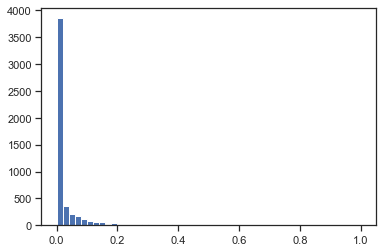

In [22]:
plt.hist(sc1_data, 50)
plt.show()

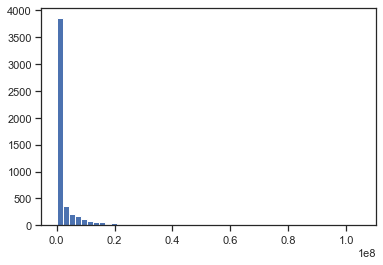

In [24]:
plt.hist(data['PRICE'], 50)
plt.show()

В данном датасете данные по умолчанию уже хорошо (может не очень ,но нормально) масштабированны.Так что использование дополнительных методов не столь необходимо

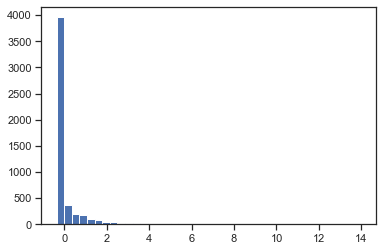

In [28]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['PRICE']])
plt.hist(sc2_data, 40)
plt.show()